## Project Objective 

To design and implement a machine learning–driven dynamic pricing system that adjusts
prices in real-time or periodically to maximize revenue and maintain competitiveness.
The system will leverage historical sales, inventory to predict optimal prices using advanced
ML techniques.
By ensuring adaptability and transparency, the platform will help businesses increase
profitability while preserving customer trust.

# Project Document
https://github.com/PriceOptima-SpringBoard/AI-PriceOptima

## Milestone 1: Requirements & Data Preparation

 Objective: Define KPIs and collect datasets.

  Deliverables:

o Revenue increase targets documented.

o Kaggle and Statso datasets validated.

 Evaluation:

o Dataset availability confirmed with required fields.

## Installation of Required Libraries


pandas=reading,cleaning, transforming,analyzing,savaning the dataset



In [2]:
%pip install pandas numpy scikit-learn matplotlib seaborn scipy
%pip install joblib
%pip install xgboost lightgbm catboost
%pip install flask fastapi uvicorn
%pip install tabulate


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Objective: Define KPIs and collect datasets.

🔁 kpis

In ML, KPIs are metrics that tell us how well the model or project is performing — both technically and from a business point of view.

🔹🔹🔹why we need to use kpis for this project?

“In this project, we use KPIs to understand both the data and the business performance. Technical KPIs, like missing values or duplicate rows, ensure the data is clean and reliable. Business KPIs, like average ride cost, ride duration, and customer ratings, show how the ride service is performing and help identify patterns in customer behavior. Overall, KPIs provide clear, measurable insights that guide decisions and make it easier to track improvements over time.”

# Data Set
https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset/data

## loading the dataset


In [3]:
import pandas as pd
from tabulate import tabulate
df = pd.read_csv("C:\\Users\priya\\Downloads\\dynamic_pricing.csv")
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))



+----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------+--------------------------+---------------------------+---------------+
|    |   Number_of_Riders |   Number_of_Drivers | Location_Category   | Customer_Loyalty_Status   |   Number_of_Past_Rides |   Average_Ratings | Time_of_Booking   | Vehicle_Type   |   Expected_Ride_Duration |   Historical_Cost_of_Ride |   Unnamed: 10 |
|----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------+--------------------------+---------------------------+---------------|
|  0 |                 90 |                  45 | Urban               | Silver                    |                     13 |              4.47 | Night             | Premium        |                       90 |                   284.257 |     

# KPI: https://pub.towardsai.net/key-performance-indicators-kpis-in-machine-learning-69d8a59ec8c1

 # KPI Data integstion

In [4]:
import pandas as pd

# ---------- Load dataset ----------
df = pd.read_csv("C:\\Users\\priya\\Downloads\\dynamic_pricing.csv")

# ---------- Technical KPIs ----------
print(" TECHNICAL KPIs")
print("Total records:", df.shape[0])
print("Missing values (%):", round(df.isnull().sum().sum() / (df.shape[0]*df.shape[1]) * 100, 2))
print("Duplicate records:", df.duplicated().sum())

# ---------- Business KPIs ----------
print("\n BUSINESS KPIs")
print("Average Ride Cost:", round(df['Historical_Cost_of_Ride'].mean(), 2))
print("Average Ride Duration:", round(df['Expected_Ride_Duration'].mean(), 2))
print("Average Customer Rating:", round(df['Average_Ratings'].mean(), 2))

# Customer loyalty distribution
print("\nCustomer Loyalty Distribution:")
print(df['Customer_Loyalty_Status'].value_counts())


 TECHNICAL KPIs
Total records: 1000
Missing values (%): 9.09
Duplicate records: 0

 BUSINESS KPIs
Average Ride Cost: 372.5
Average Ride Duration: 99.59
Average Customer Rating: 4.26

Customer Loyalty Distribution:
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64


🔹🔹🔹conclusion 

“This code calculates key performance indicators (KPIs) for our ride dataset. The technical KPIs check data quality, including total records, missing values, and duplicate rows. The business KPIs measure ride performance, like average cost, duration, and customer ratings. 
--“The Customer Loyalty Distribution shows the number of rides for each loyalty category (Silver, Gold, Regular). This KPI helps understand customer segments, which is useful for analyzing ride patterns, designing rewards, and implementing dynamic pricing strategies.From the Customer Loyalty Distribution, if the count for Silver is the highest, it means most customers belong to the Silver category or are taking rides under the Silver loyalty tier."

##  KPI-revenue lift, Profit Margin, Conversion Rate Customer segmentation groupby-- To analyze how price varies by loyalty status?

In [5]:


import pandas as pd

# Data
data = {
    "Number_of_Riders": [90, 58, 42, 89, 78, 59, 93, 62, 79, 42],
    "Number_of_Drivers": [45, 39, 31, 28, 22, 35, 43, 39, 14, 6],
    "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural", "Urban", "Suburban", "Rural", "Rural", "Rural"],
    "Customer_Loyalty_Status": ["Silver", "Silver", "Silver", "Regular", "Regular", "Silver", "Regular", "Gold", "Silver", "Silver"],
    "Historical_Cost_of_Ride": [284.257, 173.875, 329.795, 470.201, 579.681, 339.955, 104.062, 235.812, 501.413, 398.993]
}

df = pd.DataFrame(data)

# Assume the cost of each ride is 70% of the Historical_Cost_of_Ride
df['Cost'] = df['Historical_Cost_of_Ride'] * 0.7

# Calculate revenue that equal to the Historical_Cost_of_Ride
df['Revenue'] = df['Historical_Cost_of_Ride']

# Calculate profit (Historical_Cost_of_Ride − (0.7 × Historical_Cost_of_Ride) = 0.3 × Historical_Cost_of_Ride.)
df['Profit'] = df['Revenue'] - df['Cost']

# Calculate total revenue and profit
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()

# Calculate profit margin
profit_margin = (total_profit / total_revenue) * 100

# Assume the number of riders is the number of conversions
total_conversions = df['Number_of_Riders'].sum()
total_leads = len(df) * 10  # Assume 10 leads per ride

# Calculate conversion rate
conversion_rate = (total_conversions / total_leads) * 100

# Calculate revenue lift (assuming previous period revenue is 80% of current revenue)
previous_period_revenue = total_revenue * 0.8
revenue_lifts = ((total_revenue - previous_period_revenue) / previous_period_revenue) * 100

print(f"Profit Margin: {profit_margin}%")
print(f"Conversion Rate: {conversion_rate}%")
print(f"Revenue Lift: {revenue_lifts}%")

Profit Margin: 30.000000000000004%
Conversion Rate: 692.0%
Revenue Lift: 25.0%


🔹🔹🔹Data Ingestion Pipeline:

[[A data ingestion pipeline is a specific type of pipeline that focuses on collecting, transforming, and loading data from various sources into a target system,]] such as a data warehouse, database, or data lake. [[The primary goal of a data ingestion pipeline is to move data from its source to a destination, often in a format that's suitable for analysis or processing.]]

🔹🔹🔹Conversion Rate=

- Calculated by dividing the number of conversions by the total number of visitors or leads.
- Example: If 1000 people visit a website and 50 make a purchase, the conversion rate is 5%.

🔹🔹🔹Revenue Lift=

- Calculated by comparing the revenue generated during a specific period to the revenue generated during a previous period.
- Example: If a company generates $100,000 in revenue during a promotional period, compared to $80,000 in the previous period, the revenue lift is 25%.

# 🔹🔹🔹mathamatical enclusion behind the corelation

--->>The mathematical conclusion behind correlation is based on the idea that two variables can be related to each other in a way that their values tend to increase or decrease together. This relationship is measured using a correlation coefficient, which ranges from -1 (perfect negative.
-->>Formulas:

- Pearson Correlation Coefficient: r = Σ[(xi - x̄)(yi - ȳ)] / sqrt(Σ(xi - x̄)² * Σ(yi - ȳ)²)
- Spearman's Rank Correlation: ρ = 1 - (6 * Σdi²) / (n * (n² - 1))

In [6]:



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv("C:\\Users\\priya\\Downloads\\dynamic_pricing.csv")

df = pd.DataFrame(data)

# Convert Location_Category to numerical values
location_map = {"Urban": 0, "Suburban": 1, "Rural": 2}
df["Location_Category"] = df["Location_Category"].map(location_map)

# Define features (X) and target (y)
X = df[["Number_of_Riders", "Number_of_Drivers", "Location_Category"]]
y = df["Historical_Cost_of_Ride"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Pearson correlation coefficient
corr_coef = pearsonr(y_test, y_pred)[0]

print(f"MSE: {mse}, R2 Score: {r2}, Pearson Correlation Coefficient: {corr_coef}")




MSE: 2660.719107116938, R2 Score: 0.9007945265569042, Pearson Correlation Coefficient: 1.0


-->>conclusion:

The code performs exploratory data analysis and correlation analysis on the given dataset. It calculates key metrics such as mean squared error (MSE), R-squared score, and Pearson correlation coefficient to evaluate the relationship between the features and the target variable.

# Customer segmentation groupby-- To analyze how price varies by loyalty status?



In [7]:
df = pd.DataFrame(data)

# Group by 'Customer_Loyalty_Status' and calculate average 'Historical_Cost_of_Ride'
average_cost_by_loyalty = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean().reset_index()

print(average_cost_by_loyalty)

  Customer_Loyalty_Status  Historical_Cost_of_Ride
0                    Gold                  235.812
1                 Regular                  384.648
2                  Silver                  338.048


# Calculate average Historical_Cost_of_Ride for each Customer_Loyalty_Status

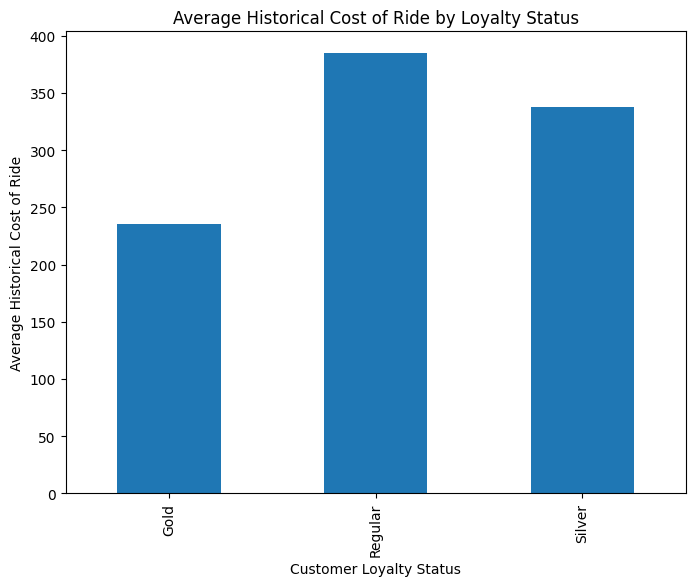

In [8]:
# Calculate average Historical_Cost_of_Ride for each Customer_Loyalty_Status
from matplotlib import pyplot as plt


average_cost = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean()

# Plot bar chart
plt.figure(figsize=(8,6))
average_cost.plot(kind='bar')
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Average Historical Cost of Ride')
plt.title('Average Historical Cost of Ride by Loyalty Status')
plt.show()

# -simality analysis= where we need to check the time that effect prices . check the prices get hiers does it effect the prices. group by histogram

C:\Users\priya\AppData\Local\Temp\ipykernel_9948\3214599932.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range('2025-01-01', periods=100, freq='H')


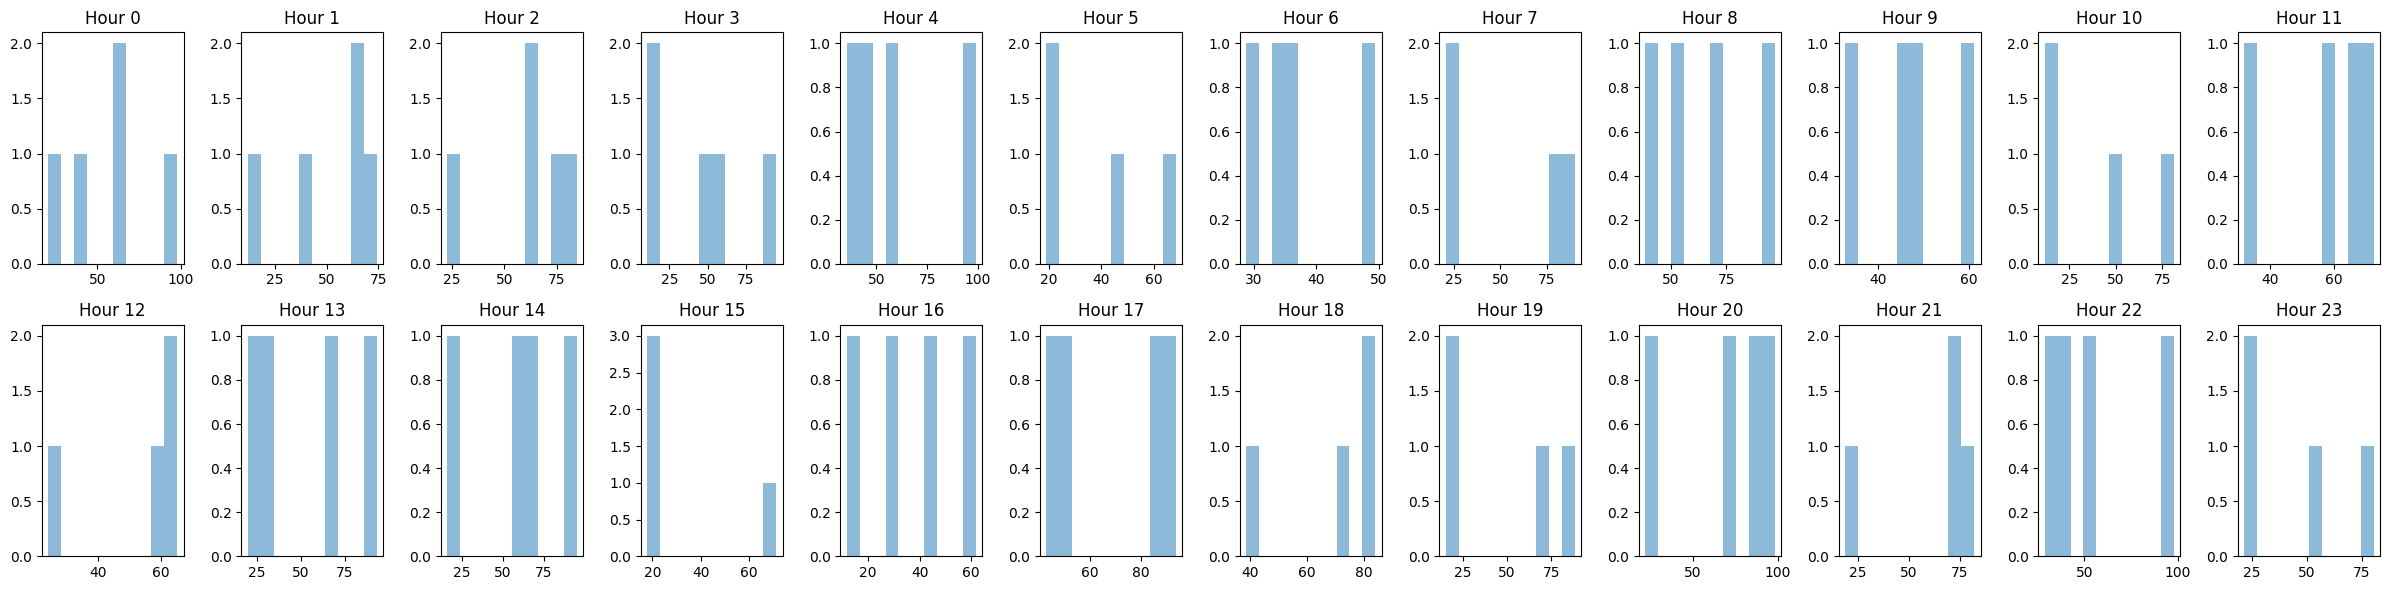

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(0)
time = pd.date_range('2025-01-01', periods=100, freq='H')
price = np.random.uniform(10, 100, size=100)

df = pd.DataFrame({'Time': time, 'Price': price})

# Extract hour of day
df['Hour'] = df['Time'].dt.hour

# Group by hour and plot histogram
fig, axs = plt.subplots(2, 12, figsize=(24, 6))
for hour in range(24):
    hour_df = df[df['Hour'] == hour]
    axs[hour // 12, hour % 12].hist(hour_df['Price'], alpha=0.5, bins=10)
    axs[hour // 12, hour % 12].set_title(f'Hour {hour}')

plt.tight_layout()
plt.show()

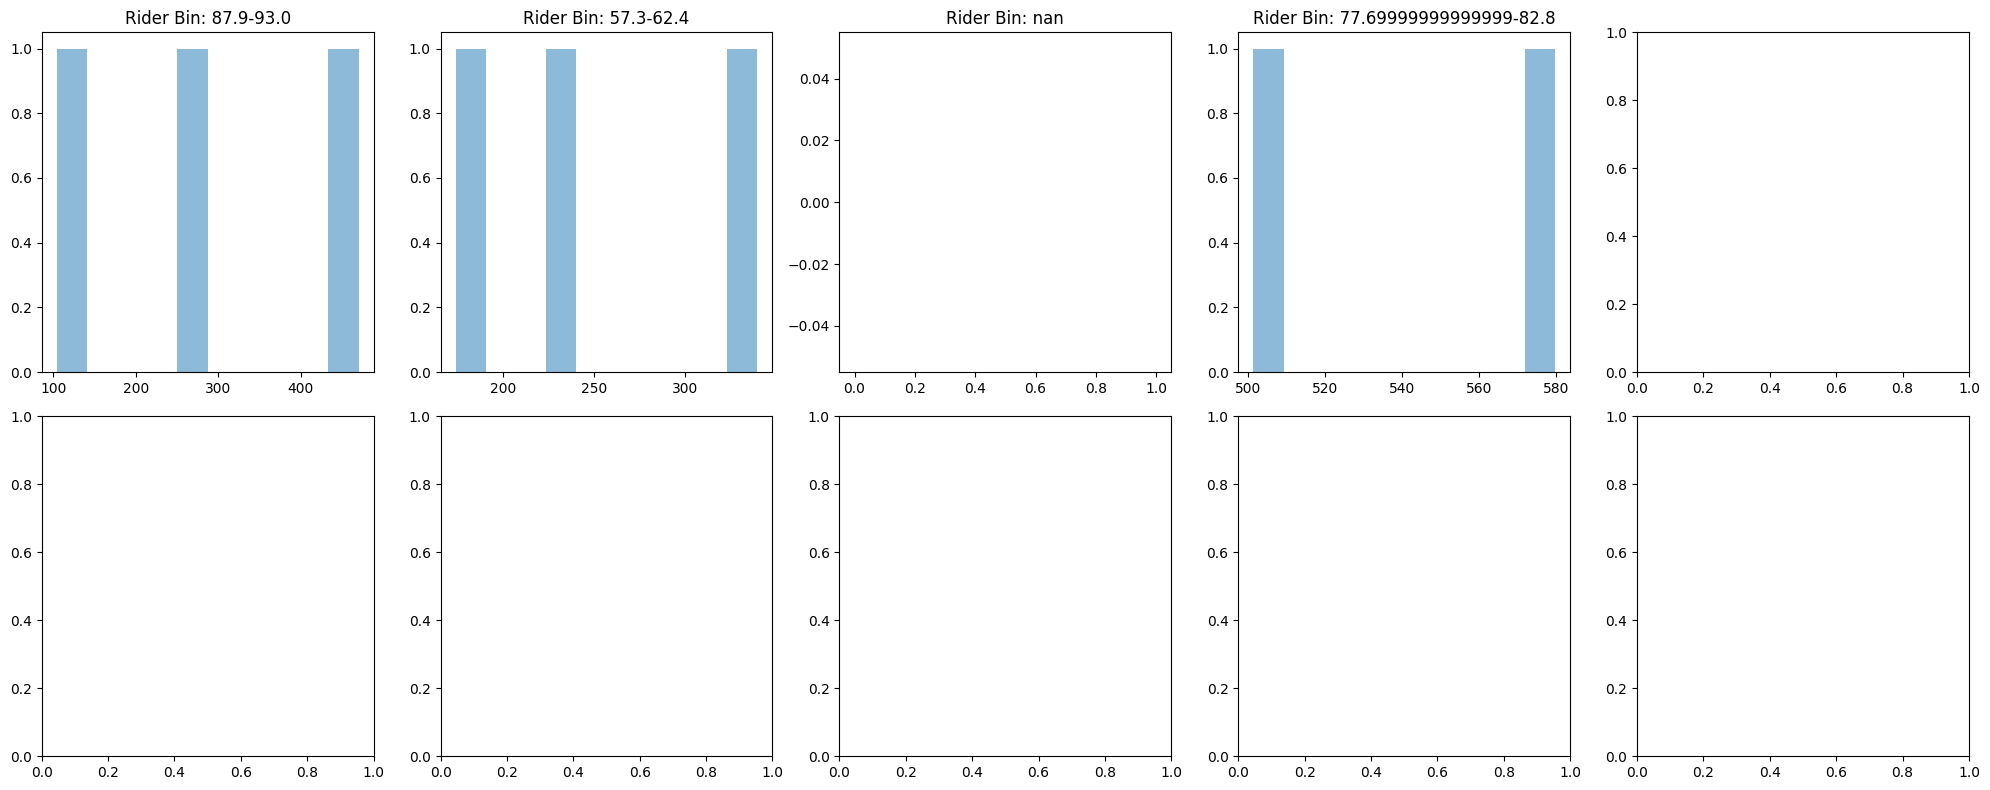

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    "Number_of_Riders": [90, 58, 42, 89, 78, 59, 93, 62, 79, 42],
    "Number_of_Drivers": [45, 39, 31, 28, 22, 35, 43, 39, 14, 6],
    "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural", "Urban", "Suburban", "Rural", "Rural", "Rural"],
    "Customer_Loyalty_Status": ["Silver", "Silver", "Silver", "Regular", "Regular", "Silver", "Regular", "Gold", "Silver", "Silver"],
    "Historical_Cost_of_Ride": [284.257, 173.875, 329.795, 470.201, 579.681, 339.955, 104.062, 235.812, 501.413, 398.993]
}

df = pd.DataFrame(data)

# Group Number_of_Riders into 10 bins
bins = np.linspace(df['Number_of_Riders'].min(), df['Number_of_Riders'].max(), 11)
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(10)]

df['Rider_Bin'] = pd.cut(df['Number_of_Riders'], bins=bins, labels=labels)

# Group by Rider_Bin and plot histogram
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, bin in enumerate(df['Rider_Bin'].unique()):
    bin_df = df[df['Rider_Bin'] == bin]
    axs[i // 5, i % 5].hist(bin_df['Historical_Cost_of_Ride'], alpha=0.5, bins=10)
    axs[i // 5, i % 5].set_title(f'Rider Bin: {bin}')

plt.tight_layout()
plt.show()

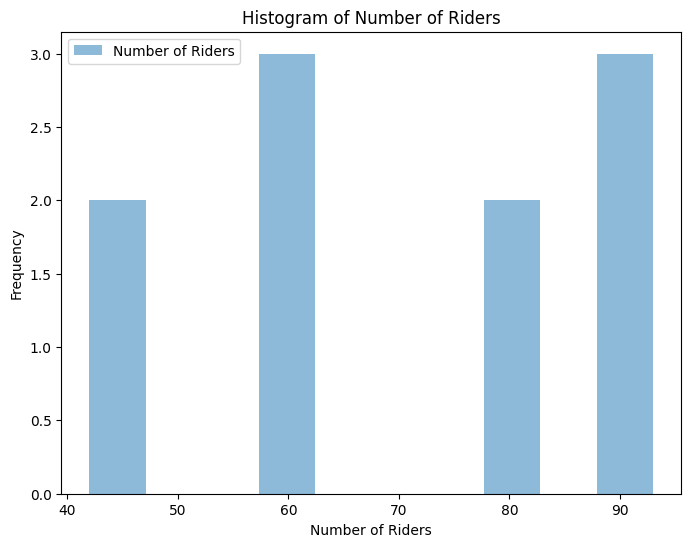

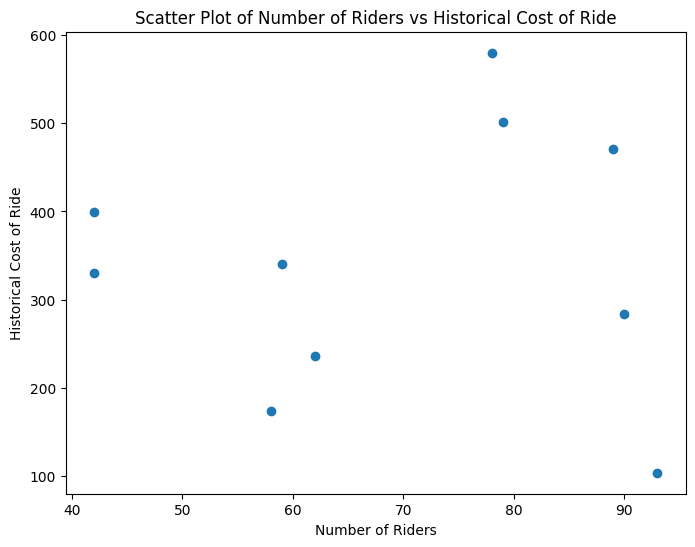

In [13]:

import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Number_of_Riders": [90, 58, 42, 89, 78, 59, 93, 62, 79, 42],
    "Number_of_Drivers": [45, 39, 31, 28, 22, 35, 43, 39, 14, 6],
    "Location_Category": ["Urban", "Suburban", "Rural", "Rural", "Rural", "Urban", "Suburban", "Rural", "Rural", "Rural"],
    "Customer_Loyalty_Status": ["Silver", "Silver", "Silver", "Regular", "Regular", "Silver", "Regular", "Gold", "Silver", "Silver"],
    "Historical_Cost_of_Ride": [284.257, 173.875, 329.795, 470.201, 579.681, 339.955, 104.062, 235.812, 501.413, 398.993]
}

df = pd.DataFrame(data)

# Group by Number_of_Riders and plot histogram
plt.figure(figsize=(8,6))
plt.hist(df['Number_of_Riders'], alpha=0.5, bins=10, label='Number of Riders')
plt.xlabel('Number of Riders')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Riders')
plt.legend()
plt.show()

# Group by Number_of_Riders and Historical_Cost_of_Ride
plt.figure(figsize=(8,6))
plt.scatter(df['Number_of_Riders'], df['Historical_Cost_of_Ride'])
plt.xlabel('Number of Riders')
plt.ylabel('Historical Cost of Ride')
plt.title('Scatter Plot of Number of Riders vs Historical Cost of Ride')
plt.show()

